# Collaboration and Competition

---



### 1. Start the Environment

Start the Environment and import necessary packages.
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`

In [1]:
from unityagents import UnityEnvironment
import numpy as np

from collections import deque
import random
import torch
from MemoryBuffer import ReplayBuffer
import gym

from competeAgent import Agent

import matplotlib.pyplot as plt
env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis.exe")

cuda:0


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print(brain_name)

TennisBrain


### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Initialize the Agent

Initializes the agent with a random seed of one.

In [4]:
seed = 1
agents = Agent(state_size,action_size,seed)
print("Completed block.")

Completed block.


### 4. DDPG algorithm

Steps through the environment, runs the agent that takes states and returns actions, then steps through. Each episode decreases epsilon which in turn decreses noise for exploration.

In [5]:
def ddpg(n_episodes=5000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.997):
    """
        Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    printEvery = 10
    scores = np.zeros(num_agents)     
    scoresAll = []                        #  list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    scoreViewer = deque(maxlen=printEvery)
    eps = eps_start                    # initialize epsilon
    max_Score = -np.Inf
    #print("got here 0")
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        scores = np.zeros(num_agents,)
        agents.reset()
        while True:  
            actions = agents.act(states,eps)
            env_info = env.step(actions)[brain_name]

            next_states = env_info.vector_observations   # get the next state
            
            rewards = env_info.rewards                   # get the reward
            dones = env_info.local_done                 # see if episode has finished
            agents.step(states,actions,rewards,next_states,dones)
            states = next_states
            scores += np.array(rewards)
            if np.any(dones):
                break 
        mScore = np.max(scores)
        scores_window.append(mScore)       # save most recent score
        scoresAll.append(mScore)              # save most recent score
        scoreViewer.append(mScore)
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        if mScore > max_Score:
            max_Score = mScore
            torch.save(agents.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agents.critic_local.state_dict(), 'checkpoint_critic.pth')
            
        if i_episode%printEvery==0:
            print('\rEpisode {}\tLocal Average: {:.3f}\tLocal Max: {:.3f}\tAverage: {:.3f}\tMax: {:.3f}'.format(i_episode, np.mean(scoreViewer),np.max(scoreViewer),np.mean(scores_window),max_Score))
        
        if np.mean(scores_window)>=0.5 and i_episode >100:
            print('\rEpisode {}\tScore: {:.3f}\tAverage: {:.3f}\tMax: {:.3f}'.format(i_episode, mScore,np.mean(scores_window),max_Score))
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.3f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agents.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agents.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    return scoresAll
print("completed block.")

completed block.


### 5. Running Training

Run the training DDPG algorithm and plot the results. The DDPG algorithm prints the results of training.

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\drlnd\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
d:\Workspace\UdacityProjects\deep-reinforcement-learning\p3_collab-compet\competeAgent.py:114: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)
d:\Workspace\UdacityProjects\deep-reinforcement-learning\p3_collab-compet\competeAgent.py:123: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.actor_local.parameters(), 1)


Episode 10	Local Average: 0.000	Local Max: 0.000	Average: 0.000	Max: 0.000
Episode 20	Local Average: 0.000	Local Max: 0.000	Average: 0.000	Max: 0.000
Episode 30	Local Average: 0.000	Local Max: 0.000	Average: 0.000	Max: 0.000
Episode 40	Local Average: 0.010	Local Max: 0.100	Average: 0.003	Max: 0.100
Episode 50	Local Average: 0.000	Local Max: 0.000	Average: 0.002	Max: 0.100
Episode 60	Local Average: 0.000	Local Max: 0.000	Average: 0.002	Max: 0.100
Episode 70	Local Average: 0.000	Local Max: 0.000	Average: 0.001	Max: 0.100
Episode 80	Local Average: 0.000	Local Max: 0.000	Average: 0.001	Max: 0.100
Episode 90	Local Average: 0.019	Local Max: 0.100	Average: 0.003	Max: 0.100
Episode 100	Local Average: 0.000	Local Max: 0.000	Average: 0.003	Max: 0.100
Episode 110	Local Average: 0.038	Local Max: 0.100	Average: 0.007	Max: 0.100
Episode 120	Local Average: 0.029	Local Max: 0.100	Average: 0.010	Max: 0.100
Episode 130	Local Average: 0.020	Local Max: 0.100	Average: 0.012	Max: 0.100
Episode 140	Local Ave

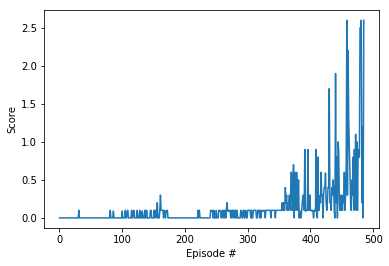

In [6]:
myScores = ddpg()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(myScores)), myScores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 6. Close the environment.

In [7]:
env.close()